In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [65]:
data = pd.read_csv('C:\python\Lib\CarPrice_Assignment.csv')

# Data preprocessing and feature selection
data.cylindernumber=data.cylindernumber.replace({'four':0,'five':1,'six':2,'eight':3,'three':4,'twelve':5,'two':6})X = data[['citympg','compressionratio','enginesize','boreratio','horsepower','carlength','carwidth','peakrpm','cylindernumber']]  # Features (independent variables)  # Features (independent variables)
y = data['price']
for i in X.T:
    fmin = X.min()
    frange = X.max() - X.min()
    X -= fmin
    X /= frange

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
weights = np.zeros(X_train.shape[1])
learning_rate = 0.5
num_iterations = 4000
cost_history = []
print(weights)
bias=1058

[0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
def costF(y_train,predictions):
    N = len(y_train)
    sq_error = (predictions - y_train) ** 2
    #print(1.0 / (2 * N) * sq_error.sum())
    return 1.0 / (2 * N) * sq_error.sum()

In [69]:
for i in range(num_iterations):
    predictions = np.dot(X_train, weights)+bias
    error = predictions-y_train
    dw = np.dot(X_train.T, error) / (X_train.shape[0])
    db = np.sum(error) / (X_train.shape[0])
    weights -= dw*learning_rate
    bias -= learning_rate * db
    current_cost = costF(y_train, predictions)
    cost_history.append(current_cost)

In [70]:
predictions_test = np.dot(X_test, weights)

In [71]:
y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()

rss = ((y_test - predictions_test) ** 2).sum()

r_squared = 1 - (rss / tss)

print(f'R-squared (R²) value: {r_squared:.4f}')

R-squared (R²) value: 0.7834


In [72]:
correct_predictions = 0
total_predictions = len(y_test)

for i in range(total_predictions):
    if abs(predictions_test[i] - y_test.iloc[i]) <= 5000:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(accuracy)

0.8536585365853658


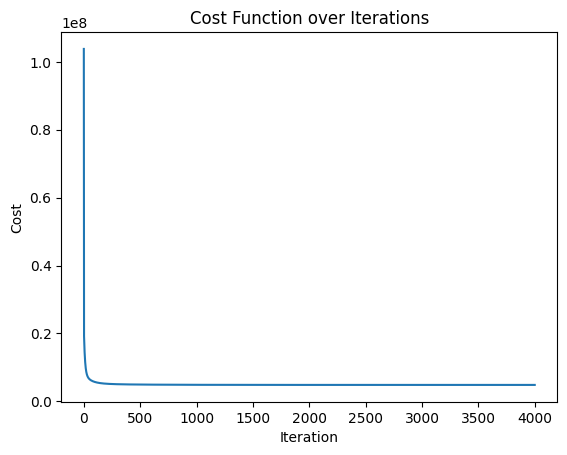

In [73]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()